# Introduction

In this report we set out to analyze GDP and Life Expectancy at Birth (LEAB) data, how it changed over time and investigate if there is a strong correlation between the two. Furthermore, we want to find a way to quantify this correlation.

The data will be prepared, analyzed and plotted in an attempt to answer a few questions:
- Did the GDP and LEAB of countries increase since 2000?
- Did GDP and LEAB change in significantly different ways among countries?
- Does the GDP correlate with the Life Expectancy at Birth?
- How much does change in GDP affect the Life Expectancy at Birth?


## Project scoping
The following categories will serve as a brief outline of the remainder of the project and will also be used as a guide for the project's process and progress.

### Project goals
The goal of the project is to investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens. We have broken down the goal into several questions that will help us build up to this goal:
- Did the GDP and LEAB of countries increase since 2000?
- Did GDP and LEAB change in significantly different ways among countries?
- Does the GDP correlate with the Life Expectancy at Birth?
- How much does change in GDP affect the Life Expectancy at Birth?

### Data
This project uses a single dataset provided in `.csv` format which contains data about the GDP and the LEAB of several countries during the years.
- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

### Analysis
In this section we will use descriptive statistics and data visualization techniques to better understand the data. Statistical inference will also be used to test if the difference in the observed values are statistically significant. Some of the key analyses that will be computed include:

1. Distributions
2. Counts
3. Relationship between variables
4. Relationship between countries
5. Hypothesys testing

### Results
We will use this section to reflect over the results of our analysis and check if we have met our objective.

## IMPORT LIBRARIES
We will use this block to import all the modules that will be used for the project.

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Data
## Loading the data
The dataset will be imported as a `Pandas Dataframe` so we can use Python to analyze it.

**all_data.csv**
- `Country` - nation
- `Year` - the year for the observation
- `Life expectancy at birth (years)` - life expectancy value in years
- `GDP` - Gross Domestic Product in U.S. dollars


In [135]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


We will change the name of the `Life expectancy at birth (years)` column name to `LEAB` to make it easier to access the data.

In [136]:
df.rename(columns={'Life expectancy at birth (years)':'LEAB'}, inplace=True)

## Explore the data

**Data characteristics**<br>
We can begin by having a look at the shape of the dataset and the data within. It has 96 rows and 4 columns.

It has no missing data.

The dataset contains data about 6 countries with values recorded over 16 years, from 2000 to 2015.

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEAB     96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [138]:
unique_countries = df.Country.unique()
print(unique_countries)
unique_country_labels = ['Chile' 'China' 'Germany' 'Mexico' 'U.S.A' 'Zimbabwe']

unique_years = df.Year.unique()
print(unique_years)

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


By using the `.describe()` method on the GDP and Life Expectancy columns, we can load a few summary statistics. 

We are also interested in determining a few other statistics not calculated by the method, such as the median and IQR of the two variables.

In [139]:
df.loc[:,['LEAB','GDP']].describe()

,LEAB,GDP
count,96.000000,9.600000e+01
mean,72.789583,3.880499e+12
std,10.672882,5.197561e+12
min,44.300000,4.415703e+09
25%,74.475000,1.733018e+11
50%,76.750000,1.280220e+12
75%,78.900000,4.067510e+12
max,81.000000,1.810000e+13


In [140]:
median_gdp = np.median(df.GDP)
q1,q3 = np.percentile(df.GDP, [25,75])
iqr_gdp = q3-q1
print('Median GDP:', np.round(median_gdp,2))
print('IQR GDP Trillions:', np.round(iqr_gdp/10**12,2))

median_leab = np.median(df.LEAB)
q1,q3 = np.percentile(df.LEAB, [25,75])
iqr_leab = q3-q1
print('Median LEAB:', np.round(median_leab,2))
print('IQR LEAB:', np.round(iqr_leab,2))

Median GDP: 1280220000000.0
IQR GDP Trillions: 3.89
Median LEAB: 76.75
IQR LEAB: 4.43


Looking at the GDP data, the **average** and **median** GDP were 3.88T and 1.28T U.S. Dollars, respectively. The distribution is unimodal and heavily right skewed with the majority of the observations to the left of the center.

The **IQR** is 3.89T, with the lowest GDP close to 0.17T and the largest GDP over 4.06T. There is one GDP of over 18T U.S. Dollars, who is considered an outlier.

The Life Expectancy at birth (LEAB) data shares simmilar characteristics, being unimodal and a heavy skew, but this time to the left. The **average** and **median** LEAB were 72.78 and 76.75 respectively.

The **IQR** is 4.43 years, with the lowest life expectancy close to 74 and the highest close to 79. There is one LEAB observation of 81 years, who is considered an outlier.

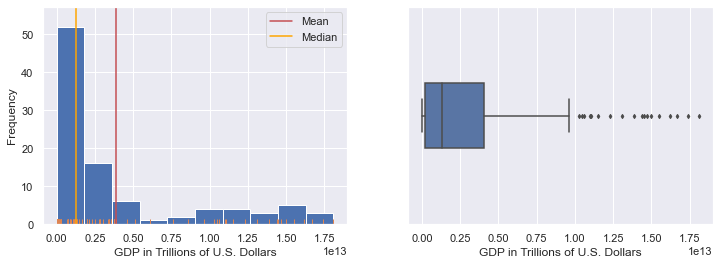

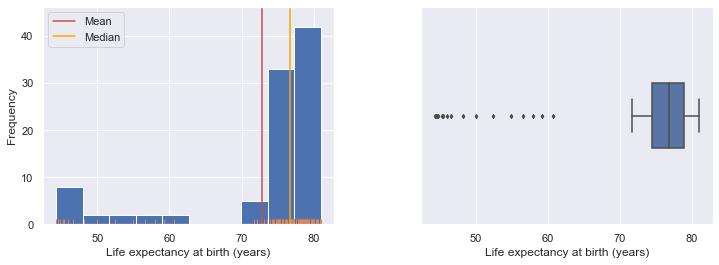

In [141]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(df.GDP)
sns.rugplot(data=df, x='GDP')
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.ylabel('Frequency')
plt.axvline(np.mean(df.GDP), color='r', label='Mean')
plt.axvline(median_gdp, color='orange', label='Median')
plt.legend()

plt.subplot(1,2,2)
sns.boxplot(data=df, x='GDP', width=0.3, fliersize=3)
plt.xlabel('GDP in Trillions of U.S. Dollars')
plt.show()

plt.close()
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(df.LEAB)
sns.rugplot(data=df, x='LEAB')
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('Frequency')
plt.axvline(np.mean(df.LEAB), color='r', label='Mean')
plt.axvline(median_leab, color='orange', label='Median')
plt.legend()

ax=plt.subplot(1,2,2)
sns.boxplot(data=df, x='LEAB', width=0.3, fliersize=3)
plt.xlabel('Life expectancy at birth (years)')

plt.subplots_adjust(wspace=0.3)
plt.show()

# Analysis

In the exploration we have found that there is a big variation in the GDP values, so in order we make the data easier to visualize, we will set all the values on the same scale of Trillions.

We will therefore create a new column with the GDP converted to Trillions of U.S. Dollars.

In [142]:
df['GDP_T'] = np.round(df.GDP/10**12,2)
df.head(5)

,Country,Year,LEAB,GDP,GDP_T
0,Chile,2000,77.3,7.786093e+10,0.08
1,Chile,2001,77.3,7.097992e+10,0.07
2,Chile,2002,77.8,6.973681e+10,0.07
3,Chile,2003,77.9,7.564346e+10,0.08
4,Chile,2004,78.0,9.921039e+10,0.10


Now that the data is loaded, we can start our analysis.<br>
The first thing we are interested in is to have a better understanding of how all the data is distributed among the Countries nested in the `Country` column.

In [143]:
df_countries = df.groupby('Country')\
    .agg({'GDP':['mean','min','max'],'LEAB':['mean','min','max']})\
    .reset_index()
df_countries.columns = ['Country','gdp_mean','gdp_min','gdp_max','mean_leab','gdp_min','gdp_max']

df_countries

,Country,gdp_mean,gdp_min,gdp_max,mean_leab,gdp_min,gdp_max
0,Chile,1.697888e+11,6.973681e+10,2.783840e+11,78.94375,77.3,80.5
1,China,4.957714e+12,1.211350e+12,1.106470e+13,74.26250,71.7,76.1
2,Germany,3.094776e+12,1.949950e+12,3.890610e+12,79.65625,78.0,81.0
3,Mexico,9.766506e+11,6.836480e+11,1.298460e+12,75.71875,74.8,76.7
4,United States of America,1.407500e+13,1.030000e+13,1.810000e+13,78.06250,76.8,79.3
5,Zimbabwe,9.062580e+09,4.415703e+09,1.630467e+10,50.09375,44.3,60.7


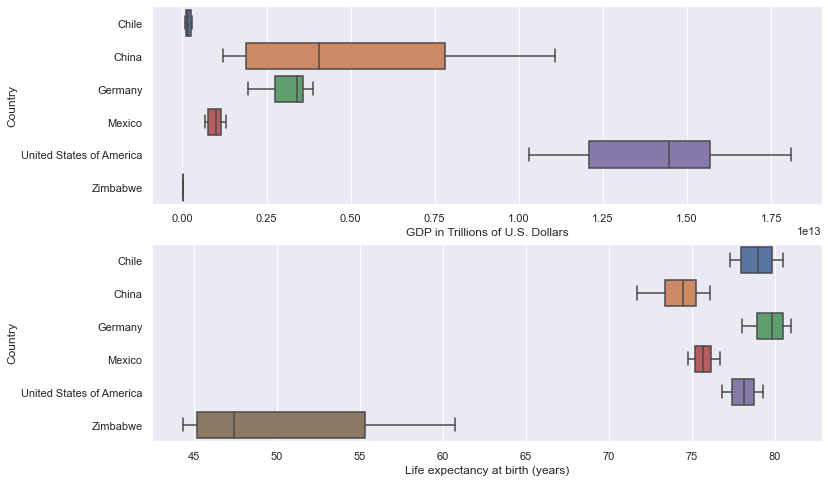

In [144]:
plt.close()
plt.figure(figsize=(12,8))
sns.set()
ax1 = plt.subplot(2,1,1)
sns.boxplot(data=df, y=df['Country'], x=df['GDP'])
ax1.set_xlabel('GDP in Trillions of U.S. Dollars')

ax2 = plt.subplot(2,1,2)
sns.boxplot(data=df, y=df['Country'], x=df['LEAB'])
ax2.set_xlabel('Life expectancy at birth (years)')
plt.show()

We can see from the table and the two boxplots how different the countries are in regards to both GDP and LEAB values. With all this variance, two countries still manage to stand out as outliers.

The U.S.A has mean GDP value of 1.40 Trillion U.S. Dollars placing it in front of all other countries in our dataset. The lead does not translate over into LEAB, where it resembles most other countries.

Zimbabwe sits last in terms of GDP, and is a clear outlier in LEAB, with a mean LEAB value of around 50 years, far behind the other countries observed.

## 1. Did the GDP and LEAB of countries increase since 2000?

First we are interested to determine if there was an increase in the two dimensions through the observed years. In order to visually explore this aspect, we will plot each of the two variables as lineplots below.

### GDP over time

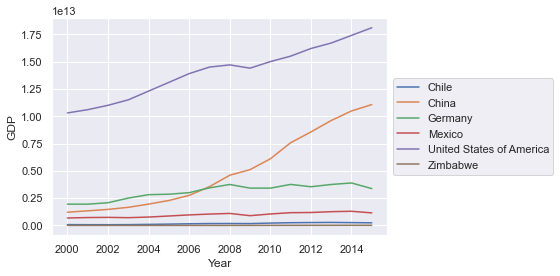

In [145]:
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

The graph reveals there has been a significant increase in `GDP` between 2000 and 2015 for China and the U.S.A., but all the other countries are squished due to the difference in scale.

For this reason, we will split the data and plot a graph for each country se we can better compare the shape of each line.

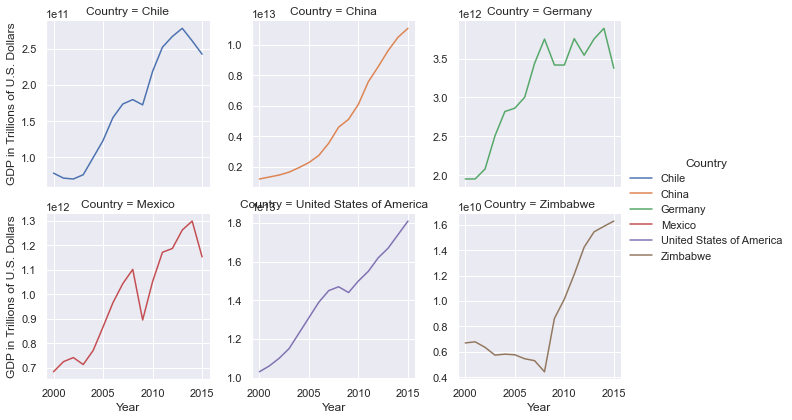

In [146]:
lineplotGDP = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)

lineplotGDP = (lineplotGDP.map(sns.lineplot, 'Year','GDP')\
    .add_legend()\
    .set_axis_labels('Year', 'GDP in Trillions of U.S. Dollars'))

lineplotGDP;

This way we can clearly see that all of the countries in our dataset have registered increases in GDP since the year 2000.

With this breakdown we can better observe a few particluarities of each country, such as a period of about 8 years during which Zimbabwe has seen a decrease in GDP, or the dip in Mexico's GDP, as well as how consistent China's growth has been.

### LEAB over time
Next we are interested to plot the same graphs for LEAB in order to see if there has been an increase over the years.

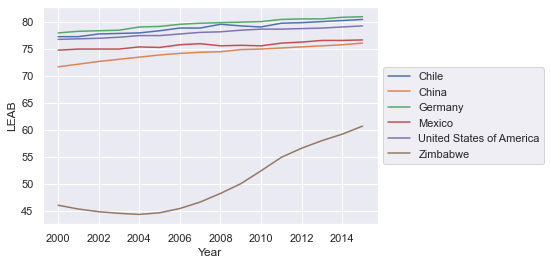

In [147]:
sns.lineplot(data=df, x='Year', y='LEAB', hue='Country')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

There seems to be an increase in LEAB for all countries, with the most evident being that of Zimbabwe.

As in the case of our GDP graphs, we are going to separate the data for each country in order to better compare the shape of the graphs.

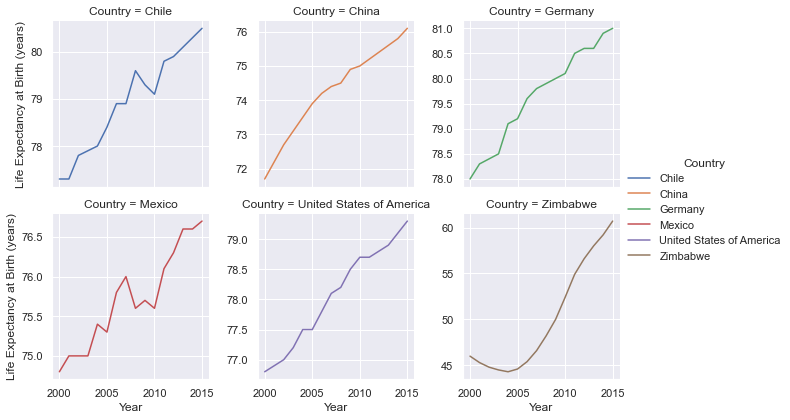

In [148]:
lineplotLEAB = sns.FacetGrid(df, col='Country', col_wrap=3, hue='Country', sharey=False)

lineplotLEAB = (lineplotLEAB.map(sns.lineplot, 'Year','LEAB')\
    .add_legend()\
    .set_axis_labels('Year', 'Life Expectancy at Birth (years)'))

lineplotLEAB;

Yet again, this breakdown brings further insight into the development of each country's LEAB over the 16 years observed, but the main takeaway is that they have all seen an increase since the year 2000.

## 2. Did GDP and LEAB change in significantly different ways among countries?

Were all countries in the dataset moving at the same pace during the observed years?

We created 4 new columns in our dataset so we can record GDP and LEAB Year over Year changes.

In [149]:
# Function to calculate yoy percentage change
def yoy_percentage(lst):
    yoy = []
    for i in range(len(lst)):
        if i%16 == 0:
            yoy.append(0)
        else:
            yoy.append(((lst[i]-lst[i-1])/lst[i-1])*100)
    return yoy

# Function to calculate yoy value change
def yoy_value(lst):
    yoy = []
    for i in range(len(lst)):
        if i%16 == 0:
            yoy.append(0)
        else:
            yoy.append(lst[i]-lst[i-1])
    return yoy

In [150]:
gdp_all = df.GDP.values
df['GDP_yoy_percent'] = yoy_percentage(gdp_all)
df['GDP_yoy_value'] = yoy_value(gdp_all)

leab_all = df.LEAB.values
df['LEAB_yoy_percent'] = yoy_percentage(leab_all)
df['LEAB_yoy_value'] = yoy_value(leab_all)

We will conduct an **ANOVA** test to determine if there has been a significant difference in how the two variables have changed over the years. The same hypotheses will be tested on GDP YOY change and LEAB YOY change.

`Null hypothesis`: The group means of change are all equal.<br>
`Alternative hypothesis`: At least one pair of group means are different.<br>
`Significance threshold`: 0.05.

Because their GDPs are on completely different scales, we will make the comparison by looking at the GDP change in percentages in order to compare the pace of the growth.

First the data will be separated by countries and then we will run the ANOVA tests.

In [151]:
from scipy.stats import f_oneway

gdp_usa = df.GDP_yoy_percent[df.Country=='United States of America']
# gdp_usa = np.array(gdp_usa)
gdp_mexico = df.GDP_yoy_percent[df.Country=='Mexico']
gdp_chile = df.GDP_yoy_percent[df.Country=='Chile']
gdp_germany = df.GDP_yoy_percent[df.Country=='Germany']
gdp_china = df.GDP_yoy_percent[df.Country=='China']
gdp_zimbabwe = df.GDP_yoy_percent[df.Country=='Zimbabwe']

fstat, pval = f_oneway(gdp_mexico, gdp_chile, gdp_usa, gdp_germany, gdp_china, gdp_zimbabwe)
print('GDP percentage change ANOVA p-val:',pval)

leab_usa = df.LEAB_yoy_value[df.Country=='United States of America']
# gdp_usa = np.array(gdp_usa)
leab_mexico = df.LEAB_yoy_value[df.Country=='Mexico']
leab_chile = df.LEAB_yoy_value[df.Country=='Chile']
leab_germany = df.LEAB_yoy_value[df.Country=='Germany']
leab_china = df.LEAB_yoy_value[df.Country=='China']
leab_zimbabwe = df.LEAB_yoy_value[df.Country=='Zimbabwe']

fstat, pval = f_oneway(leab_mexico, leab_chile, leab_usa, leab_germany, leab_china, leab_zimbabwe)
print('LEAB change ANOVA p-val:',pval)

GDP percentage change ANOVA p-val: 0.11496930035236853
LEAB change ANOVA p-val: 1.4888172017719446e-05


After runing the tests, we can validate the null hypothesis in the case of GDP change. Given that the countries are spread out across the world, this might indicate that there has been a global growth trend that all the countries in our dataset were part of.

However, in the case of LEAB change, the ANOVA test rejects the null hypothesis and concludes that there is at least one pair of countries that has a significant difference in the mean LEAB change.

In order to determine which pair that is, while maintaining a low probability of a type I error, we will run a **Tukey's Range Test**.

In [152]:
tukey_results = pairwise_tukeyhsd(df.LEAB_yoy_value, df.Country, 0.05)
tukey_results = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
tukey_results[tukey_results.reject]

,group1,group2,meandiff,p-adj,lower,upper,reject
4,Chile,Zimbabwe,0.7188,0.001,0.2465,1.1910,True
8,China,Zimbabwe,0.6438,0.002,0.1715,1.1160,True
11,Germany,Zimbabwe,0.7313,0.001,0.2590,1.2035,True
13,Mexico,Zimbabwe,0.8000,0.001,0.3278,1.2722,True
14,United States of America,Zimbabwe,0.7625,0.001,0.2903,1.2347,True


The Tukey's Range Test reveals that all the countries LEAB changed in a simmilar pace, except for Zimbabwe, which had a significantly different mean change compared to all the others.

## 3. Does the GDP correlate with the Life Expectancy at Birth?

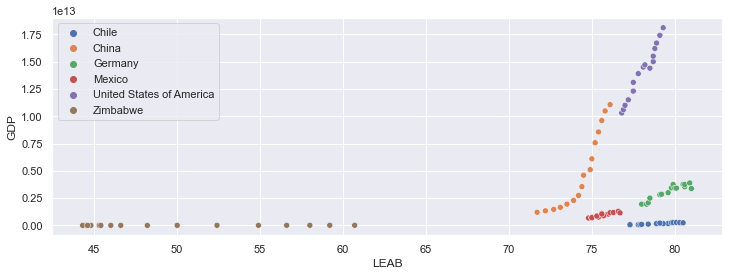

In [153]:
plt.close()
plt.figure(figsize=(12,4))

sns.scatterplot(x=df.LEAB, y=df.GDP, hue=df.Country)
plt.legend()
plt.show()

In [154]:
corr_gdp_leab, p = pearsonr(df['GDP'], df['LEAB'])
print('Pearson correlation coefficient:', corr_gdp_leab)

Pearson correlation coefficient: 0.343206748449156


By calculating the Pearson correlation coefficient __[*](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)__ we can draw the conclusion that there is a positive linear correlation between GDP and Life Expectancy at Birth in our dataset, but with the coefficient value sitting under 0.5, the correlation is not very strong.

This correlation can be roughly observed in the scatterplot above, but further analyzing each of the countries in the dataset might reveal different correlation coefficients.

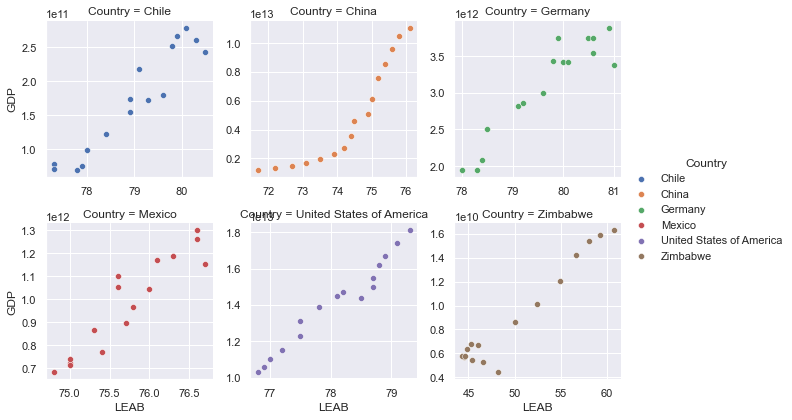

In [155]:
scatter_gdp_leaby = sns.FacetGrid(df, col_wrap=3, col='Country', hue='Country', sharex=False, sharey=False)
scatter_gdp_leaby = (scatter_gdp_leaby.map(sns.scatterplot, 'LEAB', 'GDP')).add_legend()

In [156]:
corr_gdp_leab_countries = []
for country in unique_countries:
    corr_gdp_leab, p = pearsonr(df['GDP'][df['Country'] == country], df.LEAB[df['Country'] == country])
    corr_gdp_leab_countries.append(corr_gdp_leab)
    
df_corr_gdp_leab = pd.DataFrame(unique_countries,  columns=['country'])
df_corr_gdp_leab['pearson_correlation'] = np.array(corr_gdp_leab_countries)
df_corr_gdp_leab

,country,pearson_correlation
0,Chile,0.949877
1,China,0.908526
2,Germany,0.932699
3,Mexico,0.932238
4,United States of America,0.981709
5,Zimbabwe,0.966200


We have plotted the relationship between the two variables for each of the countries in our dataset, and together with the Pearson correlation coefficient we can say that **there is a strong positive correlation between a country's GDP and LEAB**.

## 4. How much does change in GDP affect the Life Expectancy at Birth?

### 4.1 Does change in GDP correlate with change in LEAB?
We will first try to determine if change of the two variables correlate, and therefore determine how likely it is that by changing one of them by a certain ammount, the other one will follow.

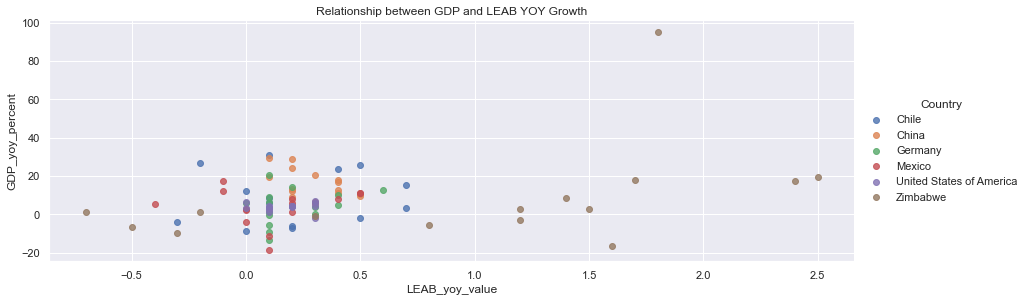

In [157]:
sns.lmplot(data=df[df['Year'] != 2000], x='LEAB_yoy_value', y='GDP_yoy_percent', hue='Country', fit_reg=False, height=4, aspect=3)
plt.title('Relationship between GDP and LEAB YOY Growth')
plt.show()

The scatterplot above reveals two aspects of the dataset we are analysing:
1. There have to be other factors that influence how much the LEAB can change YOY. This is illustrated by the concentration of points in the 0 to 0.5 LEAB YOY value, even if there have been changes in GDP anywhere from -20% to over 30%.
2. Zimbabwe is a clear outlier in how much the LEAB was able to change YOY, even if the GDP growth was not the best performing of the dataset to say the least.

In [158]:
corr_gdp_leab_yoy, p = pearsonr(df.GDP_yoy_percent, df.LEAB_yoy_value)
print('Pearson correlation coefficient:', corr_gdp_leab_yoy)

Pearson correlation coefficient: 0.3117392578478606


Calculating the strength of the correlation illustrated above returns a value only slightly lower than the correlation between GDP and LEAB for the entire dataset.

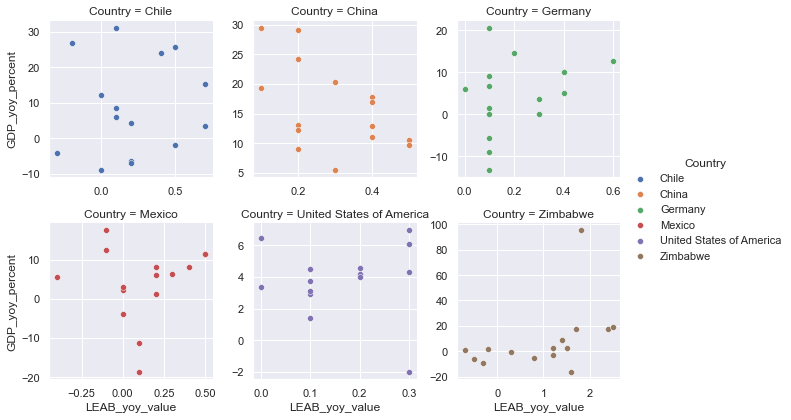

In [159]:
scatter_yoy_gdp_leaby = sns.FacetGrid(df[df['Year'] != 2000], col_wrap=3, col='Country', hue='Country', sharex=False, sharey=False)
scatter_yoy_gdp_leaby = (scatter_yoy_gdp_leaby.map(sns.scatterplot, 'LEAB_yoy_value', 'GDP_yoy_percent')).add_legend()

In [160]:
corr_gdp_leab_yoy = []
for country in unique_countries:
    corr_gdp_leab, p = pearsonr(df['GDP_yoy_percent'][df['Country'] == country], df['LEAB_yoy_value'][df['Country'] == country])
    corr_gdp_leab_yoy.append(corr_gdp_leab)
    
df_corr_gdp_leab_yoy = pd.DataFrame(unique_countries,  columns=['Country'])
df_corr_gdp_leab_yoy['pearson_correlation'] = np.array(corr_gdp_leab_yoy)

df_corr_gdp_leab_yoy

,Country,pearson_correlation
0,Chile,0.131454
1,China,-0.141828
2,Germany,0.319078
3,Mexico,0.133754
4,United States of America,0.139476
5,Zimbabwe,0.427416


Once we break down the data into individual countries, we get results that together with the results of the initial GDP - LEAB correlation allow us to further understand the dynamic between GDP and LEAB.
Although we can observe the two moving generally in the same direction, they do not seem to be moving at a simmilar pace. **GDP growth weakly correlates with a simmilar sized growth of LEAB.**
This reinforces the revelation of the first scatterplot, that in general there must be other variables that play at least a simmilar role to the GDP when it comes to the evolution of the LEAB.

However, we can once again observe the case of the least developed country of the dataset in both dimensions. In the case of Zimbabwe, we do have a correlation between GDP and LEAB YOY growth.
This means that if our aim was to increase LEAB, investing in the GDP of countries with simmilar GDP and LEAB to Zimbabwe would be more efficient and have more impact compared to countries like the United States of America and China.

### 4.2 GDP-LEAB impact and ratio

In [161]:
gdp_mean_countries = []
for country in unique_countries:
    gdp_mean_countries.append(df.GDP_yoy_value[df.Country == country].mean() / 10**9)

leab_mean_countries = []
for country in unique_countries:
    leab_mean_countries.append(df.LEAB_yoy_value[df.Country == country].mean())

df_gdp_leab_mean = pd.DataFrame(unique_countries, columns=['Country'])
df_gdp_leab_mean['GDP_mean_billion'] = gdp_mean_countries
df_gdp_leab_mean['LEAB_mean'] = leab_mean_countries

df_gdp_leab_mean

,Country,GDP_mean_billion,LEAB_mean
0,Chile,10.291067,0.20000
1,China,615.834375,0.27500
2,Germany,89.103750,0.18750
3,Mexico,29.288250,0.11875
4,United States of America,487.500000,0.15625
5,Zimbabwe,0.600919,0.91875


In [162]:
gdp_mean_change = df_gdp_leab_mean.GDP_mean_billion.mean()
leab_mean_change = df_gdp_leab_mean.LEAB_mean.mean()

print('Dataset GDP mean change:',np.round(gdp_mean_change,2))
print('Dataset LEAB mean change:',np.round(leab_mean_change,2))

print('GDP (billions) to LEAB (years) ratio:',np.round(gdp_mean_change/leab_mean_change,2),'to 1')

Dataset GDP mean change: 205.44
Dataset LEAB mean change: 0.31
GDP (billions) to LEAB (years) ratio: 664.04 to 1


For our dataset, it took on average an increase of 664.04 Billions U.S. Dollars in a country's GDP to increase the LEAB by 1 year.

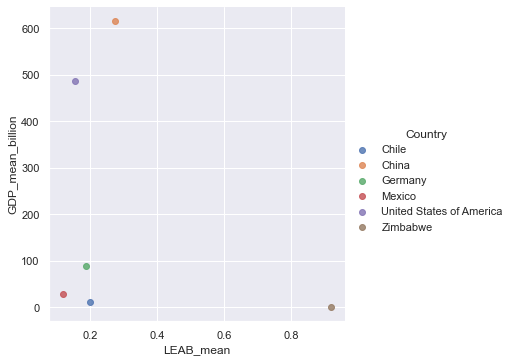

In [163]:
sns.lmplot(data=df_gdp_leab_mean, x='LEAB_mean', y='GDP_mean_billion', hue='Country')

In [164]:
gdp_mean_change_zw = df_gdp_leab_mean.GDP_mean_billion\
    [df_gdp_leab_mean.Country == 'Zimbabwe']\
    .mean()
leab_mean_change_zw = df_gdp_leab_mean.LEAB_mean\
    [df_gdp_leab_mean.Country == 'Zimbabwe']\
    .mean()

print('Dataset GDP mean change:',np.round(gdp_mean_change_zw,2))
print('Dataset LEAB mean change:',np.round(leab_mean_change_zw,2))

print('GDP (billions) to LEAB (years) ratio:',np.round(gdp_mean_change_zw/leab_mean_change_zw,2),'to 1')

Dataset GDP mean change: 0.6
Dataset LEAB mean change: 0.92
GDP (billions) to LEAB (years) ratio: 0.65 to 1


Over the 16 years observed, Zimbabwe was able to have a yearly mean increase in LEAB of close to 1 year with only a bit over half a billion mean increase in GDP.

# Results

This project was able to make a few data visualizations and inferences about the GDP and LEAB of the 6 countries in our dataset.

Through the analysis we were able to find an answer to our initial questions:
- Did the GDP and LEAB of countries increase since 2000?
    - Yes, both metrics have increased since the year 2000. However, as we were able to observe by individualy graphing each country, the increase was not as steady or uniform for each country during this period, with each having its own particularities.
- Did GDP and LEAB change in significantly different ways among countries?
    - By looking at the mean rate of growth of GDP, all countries have increased their GDP in a simmilar pace, with the difference between any of the pairs not being significant.
    - The LEAB change however, did have a significant outlier, Zimbabwe, which outpaced all the other countries.
- Does the GDP correlate with the Life Expectancy at Birth?
    - Yes, there is a strong positive correlation between the economic output of a country and the life expectancy at birth of its citizens.
- By how much does change in GDP affect the Life Expectancy at Birth?
    - For the entire dataset, the average ratio is 664.04 Billion U.S. Dollars for every 1 year increase in LEAB. For this result it is important to keep in mind how diverse our dataset is.
    - Zimbabwe is yet again an outlier, with a ratio of 0.65 Billion U.S. Dollars for every 1 year increase in LEAB.